# Exploratory Analysis

## Imports

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Configure inline plotting

In [4]:
%matplotlib inline

Define path to data, read in data

In [61]:
df_path = "data/nasdaq/2017/NASDAQ_20170103.csv"

In [62]:
df = pd.read_csv(df_path)

A guess at the column labels after looking at the data

In [63]:
data_columns = ["ticker", "date", "open", "high", "low", "close", "volume"]

In [64]:
df.columns = data_columns

Confirm trade price columns are correct by comparison

In [15]:
(df.open > df.high).any()

False

In [17]:
(df.open < df.low).any()

False

In [18]:
(df.close < df.low).any()

False

In [19]:
(df.close > df.high).any()

False

In [20]:
(df.high < df.low).any()

False

In [65]:
def append_days_trades(df, total_df):
    df1 = df.close
    df1.index = df.ticker
    total_df.loc[:, df.date.iloc[0]] = df1
    return total_df

In [66]:
total_df = pd.DataFrame(index=df.ticker)
total_df = append_days_trades(df, total_df)

In [84]:
all_files = os.listdir('data/nasdaq/2017')

In [85]:
all_files.sort()

In [90]:
file_list = all_files[3:]


Create a master dataframe for the entire 2017 year by opening every file, and appending the days closing value to the dataframe as a new column with the days date

In [92]:
for file_name in file_list:
    df = pd.read_csv("data/nasdaq/2017/{}".format(file_name))
    df.columns = data_columns
    total_df = append_days_trades(df, total_df)

Transpose the data and find the correlation values between all of the different companies

In [93]:
comp_df = total_df.T
correlation_df = comp_df.corr()

In [100]:
comp_df.to_csv('data/summary/nasdaq_2017_close.csv')
correlation_df.to_csv('data/summary/nasdaq_2017_correlations.csv')

In [5]:
comp_df = pd.read_csv('data/summary/nasdaq_2017_close.csv', index_col=0)

In [26]:
correlation_df = pd.read_csv('data/summary/nasdaq_2017_correlations.csv', index_col=0)

In [38]:
correlation_df[correlation_df == 1.] = 0

In [58]:
trim_corr = correlation_df[correlation_df > .9]

In [61]:
trim_corr = trim_corr.dropna(axis=1, how='all')

In [66]:
trim_corr

,AAOI,AAPL,AAXJ,ABCD,ABDC,ABEO,ABEOW,ABIL,ABIO,ABMD,...,ZBIO,ZBRA,ZG,ZGNX,ZION,ZIONW,ZIV,ZN,ZNGA,ZYNE
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAPL,NaN,NaN,0.933787,NaN,NaN,NaN,NaN,NaN,NaN,0.904352,...,NaN,NaN,NaN,NaN,NaN,NaN,0.908284,NaN,NaN,NaN
AAWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAXJ,NaN,0.933787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951601,...,NaN,0.911157,NaN,NaN,NaN,NaN,0.968955,NaN,0.948045,NaN
AAXN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def save_df_plot(df, corr_df, col_1, col_2):
    df1 = df.loc[:, [col_1, col_2]]
    df1.plot()
    plt.savefig("data/{}-{}-{:03.2f}.png".format(col_1, col_2, corr_df.loc[col_1, col_2]))

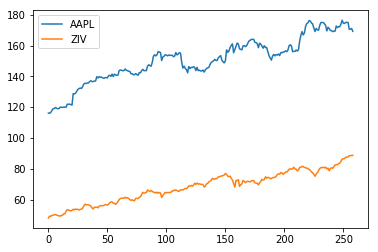

In [57]:
save_df_plot(comp_df, correlation_df, 'AAPL', 'ZIV')

In [67]:
notable_pairs = [
    ['ABEO', 'ABEOW'],
    ['ABMD', 'AAXJ']
]

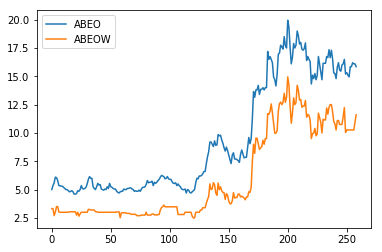

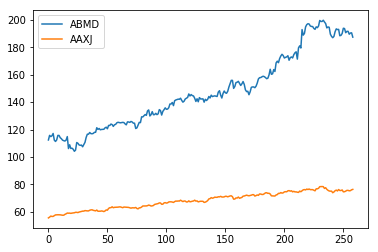

In [69]:
for i in iter(notable_pairs):
    save_df_plot(comp_df, correlation_df, i[0], i[1])